In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_index= pd.read_excel(r"中证500指数（CCt）.xlsx")
#delete row 0 1 2
df_index.drop([0,1,2],inplace=True)
df_index.head()
#change column name to Date and Index_Level
df_index.columns=['date','index_level']
#sort by date
df_index.sort_values(by='date',ascending=True,inplace=True)
#drop index 3595,3594
#df_index.drop([3595,3594],inplace=True)
df_index


,date,index_level
2373,2013-04-08,3411.13
2372,2013-04-09,3444.37
2371,2013-04-10,3437.27
2370,2013-04-11,3423.22
2369,2013-04-12,3394.52
...,...,...
7,2022-12-26,5843.26
6,2022-12-27,5885.66
5,2022-12-28,5862.1
4,2022-12-29,5857.4


In [3]:
df_index['date']=pd.to_datetime(df_index['date'])
df_index.set_index("date", inplace=True)
quarter_groups=df_index.groupby(pd.Grouper(freq='Q'))
#find the last day of each week
df_index_quarter=quarter_groups.last()
df_index_quarter.dropna(inplace=True)

In [4]:
df_index_quarter['quarter'] = range(1, len(df_index_quarter) + 1)
df_index_quarter.set_index("quarter", inplace=True)
df_index_quarter

,index_level
quarter,
1,3235.98
2,3872.89
3,3829.10
4,3840.54
5,3924.90
6,4916.12
7,5322.71
8,7253.10
9,8906.02


In [5]:
#last 4 quarters' max value for weekly_indexLevel Dataset
df_index_quarter['max_4'] = None
for i in range(5, len(df_index_quarter)+1):
    previous_4 = df_index_quarter.loc[i-4:i-1, 'index_level']  
    max_value = previous_4.max()  
    df_index_quarter.at[i, 'max_4'] = max_value  

df_index_quarter

,index_level,max_4
quarter,,
1,3235.98,None
2,3872.89,None
3,3829.10,None
4,3840.54,None
5,3924.90,3872.89
6,4916.12,3924.9
7,5322.71,4916.12
8,7253.10,5322.71
9,8906.02,7253.1


In [6]:
#calculate ML = index_level/(max of last 4 quarters) and create a new column
df_index_quarter['ML'] = df_index_quarter['index_level']/df_index_quarter['max_4']
df_index_quarter

,index_level,max_4,ML
quarter,,,
1,3235.98,None,NaN
2,3872.89,None,NaN
3,3829.10,None,NaN
4,3840.54,None,NaN
5,3924.90,3872.89,1.013429
6,4916.12,3924.9,1.252547
7,5322.71,4916.12,1.082705
8,7253.10,5322.71,1.362671
9,8906.02,7253.1,1.227892


In [7]:
#find the mean and standard deviation of ML for past 12 months
df_index_quarter['mean_4'] = None
df_index_quarter['std_4'] = None
for i in range(9, len(df_index_quarter)+1):
    previous_4 = df_index_quarter.loc[i-4:i-1, 'ML']  
    mean_value = previous_4.mean()  
    std_value = previous_4.std()  
    df_index_quarter.at[i, 'mean_4'] = mean_value  
    df_index_quarter.at[i, 'std_4'] = std_value

df_index_quarter

,index_level,max_4,ML,mean_4,std_4
quarter,,,,,
1,3235.98,None,NaN,None,None
2,3872.89,None,NaN,None,None
3,3829.10,None,NaN,None,None
4,3840.54,None,NaN,None,None
5,3924.90,3872.89,1.013429,None,None
6,4916.12,3924.9,1.252547,None,None
7,5322.71,4916.12,1.082705,None,None
8,7253.10,5322.71,1.362671,None,None
9,8906.02,7253.1,1.227892,1.177838,0.158981


In [17]:
df_index_quarter['mean-1.5*std'] = df_index_quarter['mean_4'] - 1.5*df_index_quarter['std_4']
df_index_quarter

,index_level,max_4,ML,mean_4,std_4,mean-1.5*std
quarter,,,,,,
1,1552.38,None,NaN,None,None,NaN
2,1643.06,None,NaN,None,None,NaN
3,1574.78,None,NaN,None,None,NaN
4,1465.78,None,NaN,None,None,NaN
5,1482.41,1643.06,0.902225,None,None,NaN
6,1619.70,1643.06,0.985783,None,None,NaN
7,2581.57,1619.7,1.593857,None,None,NaN
8,2754.66,2581.57,1.067048,None,None,NaN
9,2870.03,2754.66,1.041882,1.137228,0.311768,0.669577


In [8]:
CCt = -1
df_index_quarter['CCt'] = None
for i in range(10, len(df_index_quarter)+1):
    previous_4 = df_index_quarter.loc[i-4:i-1, 'ML'] 
    ML_mean =  previous_4.mean()  
    ML_sd = previous_4.std()
    if df_index_quarter['ML'][i] < ML_mean - 1.5*ML_sd:
        CCt = 1

    else:
        CCt = 0

    df_index_quarter.at[i, 'CCt'] = CCt

In [9]:
#to csv
df_index_quarter.to_csv(r'1.5_500_IL_quarter_ML.csv', index = True, header=True)

In [10]:
df_index_quarter.describe()

,index_level
count,39.000000
mean,5781.127436
std,1178.437545
min,3235.980000
25%,4995.965000
50%,6123.490000
75%,6347.600000
max,8906.020000


In [11]:
df_index_quarter["CCt"].describe()

count     30
unique     2
top        0
freq      24
Name: CCt, dtype: int64

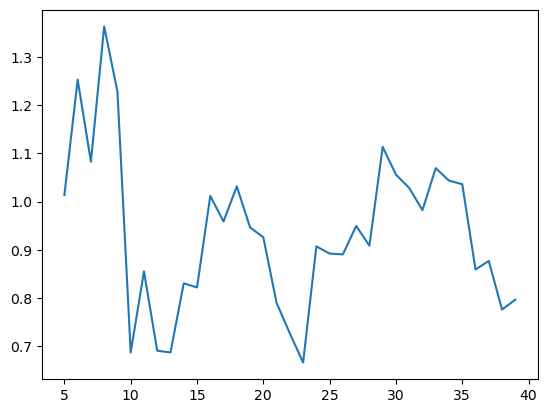

In [12]:
ypoints = df_index_quarter['ML']
plt.plot(ypoints)

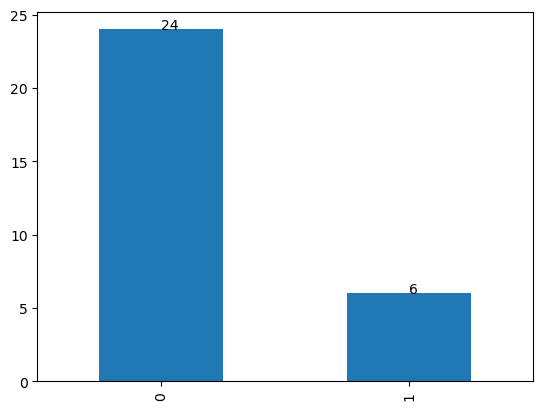

In [14]:
df_index_quarter['CCt'].value_counts().plot(kind='bar')
for index, value in enumerate(df_index_quarter['CCt'].value_counts()):
    plt.text(index, value, str(value))

plt.show()